In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from specfunctions.data import *
from specfunctions.plotting import *
%matplotlib inline
plt.style.use('seaborn')

pd.options.display.max_rows = 20
pd.options.display.max_columns = 40

In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn import linear_model

In [3]:
tw_all_spectra = read_spectral_data('tw_abs_adj_lrb.csv', 'tw_abs_adj_lrb_aux.csv')

tw_core_spectra = extract_core_spectra(tw_all_spectra, 'tw_cores.csv')

tw_chem_data = read_chemical_data('tw_chemical.csv', 'tw_cores.csv')

determine_chemical_rows(tw_chem_data, tw_core_spectra, 'Core', 'ID_LRB')

chem_columns = ['OM', 'P1', 'P2', 'k', 'mg', 'ca', 'pH', 'bpH', 'CEC']

interpolate_for_all_chem_columns(tw_chem_data, tw_core_spectra, chem_columns)

In [4]:
te_all_spectra = read_spectral_data('te_abs_lrb.csv', 'te_abs_lrb_aux.csv')

te_core_spectra = extract_core_spectra(te_all_spectra, 'te_cores.csv')

te_chem_data = read_chemical_data('te_chemical.csv', 'te_cores.csv')

determine_chemical_rows(te_chem_data, te_core_spectra, 'Core', 'ID_LRB')

chem_columns = ['OM', 'P1', 'P2', 'k', 'mg', 'ca', 'pH', 'bpH', 'CEC']

interpolate_for_all_chem_columns(te_chem_data, te_core_spectra, chem_columns)

In [5]:
rep_all_spectra = read_spectral_data('Rep_Spec_Absorbance_barrett_mod.csv', 'Rep_Spec_Aux_columns_mod.csv')

rep_core_spectra = extract_core_spectra(rep_all_spectra, 'Rep_Core_IDs_mod.csv')

rep_chem_data = read_chemical_data('Rep_chemical.csv', 'Rep_Core_IDs_mod.csv')

determine_chemical_rows(rep_chem_data, rep_core_spectra, 'Core', 'ID_LRB')

chem_columns = ['OM', 'P1', 'P2', 'k', 'mg', 'ca', 'pH', 'bpH', 'CEC']

interpolate_for_all_chem_columns(rep_chem_data, rep_core_spectra, chem_columns)

In [6]:
frames = [te_core_spectra, tw_core_spectra, rep_core_spectra]
all_core = pd.concat(frames, ignore_index = True, sort = False)

In [7]:
col_mapping = [f'{c[0]}:{c[1]}' for c in enumerate(all_core.columns)]

In [8]:
col_mapping

['0:Core',
 '1:Northing',
 '2:Easting',
 '3:ID_x',
 '4:ID_LRB',
 '5:Row_ID_LRB',
 '6:Row_no',
 '7:Long',
 '8:Lat',
 '9:Altitud',
 '10:EC_SH',
 '11:Site',
 '12:CalNumber',
 '13:DayNumber',
 '14:FieldNotes_ID',
 '15:ID_y',
 '16:UTC',
 '17:TimeDiff',
 '18:TimeCalc',
 '19:ForcedDate/time conversion',
 '20:Ctrl_Te',
 '21:Spec_Hu',
 '22:Aux_Tem',
 '23:Aux_Hum',
 '24:Steps',
 '25:Speed',
 '26:Force',
 '27:Insrt. ',
 '28:Depth',
 '29:348.7',
 '30:354.69',
 '31:360.67',
 '32:366.64',
 '33:372.6',
 '34:378.56',
 '35:384.5',
 '36:390.44',
 '37:396.37',
 '38:402.28',
 '39:408.19',
 '40:414.09',
 '41:419.98',
 '42:425.87',
 '43:431.74',
 '44:437.6',
 '45:443.46',
 '46:449.3',
 '47:455.14',
 '48:460.96',
 '49:466.78',
 '50:472.58',
 '51:478.38',
 '52:484.17',
 '53:489.95',
 '54:495.71',
 '55:501.47',
 '56:507.22',
 '57:512.96',
 '58:518.69',
 '59:524.41',
 '60:530.11',
 '61:535.81',
 '62:541.5',
 '63:547.18',
 '64:552.85',
 '65:558.5',
 '66:564.15',
 '67:569.79',
 '68:575.41',
 '69:581.03',
 '70:586

In [27]:
X = all_core.loc[:, '425.87':'701.81']

In [28]:
X

,425.87,431.74,437.6,443.46,449.3,455.14,460.96,466.78,472.58,478.38,484.17,489.95,495.71,501.47,507.22,512.96,518.69,524.41,530.11,535.81,...,597.81,603.38,608.95,614.5,620.04,625.57,631.09,636.6,642.09,647.58,653.05,658.51,663.97,669.41,674.84,680.25,685.66,691.05,696.44,701.81
0,-1.302091,-1.223519,-1.218697,-1.193672,-1.165253,-1.114333,-1.068029,-1.007155,-0.957437,-0.916282,-0.854836,-0.820421,-0.788585,-0.732431,-0.703891,-0.655219,-0.598295,-0.583477,-0.559844,-0.529444,...,-0.223749,-0.204834,-0.184124,-0.158545,-0.143308,-0.116257,-0.096957,-0.090530,-0.073640,-0.052120,-0.032167,-0.017365,-0.019542,-0.005582,0.006796,0.018522,0.070088,0.084018,0.064297,0.070580
1,-0.544023,-0.488847,-0.496188,-0.472319,-0.452429,-0.416930,-0.381194,-0.335123,-0.299094,-0.272568,-0.229608,-0.208915,-0.191091,-0.160646,-0.148410,-0.126944,-0.105112,-0.104028,-0.097206,-0.082113,...,0.011233,0.015138,0.019460,0.025651,0.027826,0.033612,0.035848,0.033337,0.034551,0.037623,0.039456,0.038921,0.032725,0.032945,0.031216,0.031426,0.044557,0.046843,0.041042,0.037933
2,0.523307,0.537364,0.547391,0.554816,0.551548,0.549619,0.550805,0.548750,0.550125,0.546068,0.541918,0.534316,0.527637,0.519788,0.513571,0.506076,0.496801,0.489415,0.479214,0.471247,...,0.381840,0.373250,0.366394,0.360418,0.353925,0.344503,0.337503,0.331050,0.323443,0.314462,0.306173,0.298760,0.291868,0.284124,0.275011,0.266472,0.259536,0.250734,0.241883,0.232158
3,0.646693,0.667249,0.686906,0.698876,0.700916,0.703534,0.709581,0.714006,0.717961,0.716794,0.716425,0.710364,0.707829,0.699731,0.695042,0.689658,0.682191,0.674731,0.665562,0.658957,...,0.574591,0.567041,0.560257,0.555948,0.550634,0.540674,0.534402,0.528684,0.522104,0.512701,0.505190,0.499427,0.494371,0.486526,0.477618,0.470665,0.465040,0.457123,0.449057,0.438724
4,0.639540,0.657688,0.675951,0.687886,0.692002,0.691198,0.699527,0.703846,0.710165,0.709370,0.710152,0.706312,0.701402,0.694899,0.690192,0.684587,0.676216,0.670892,0.659594,0.653398,...,0.568543,0.561595,0.557015,0.552844,0.548788,0.540417,0.534767,0.530077,0.524207,0.516526,0.509713,0.504938,0.500291,0.494756,0.486110,0.480106,0.475519,0.468884,0.461280,0.452240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829,0.880168,0.833644,0.791703,0.768546,0.753578,0.738846,0.733696,0.721694,0.714958,0.708604,0.701404,0.695057,0.687428,0.676947,0.667676,0.659394,0.649825,0.641526,0.630788,0.618803,...,0.545286,0.540615,0.536527,0.535287,0.532165,0.527335,0.523226,0.521201,0.517812,0.511864,0.507174,0.505022,0.500535,0.496161,0.489877,0.483930,0.479128,0.474680,0.468475,0.461902
830,0.725654,0.693302,0.666973,0.647005,0.635425,0.623785,0.615265,0.609420,0.601828,0.595072,0.588268,0.579815,0.571642,0.560760,0.549951,0.539613,0.528222,0.518192,0.504724,0.492692,...,0.402858,0.398229,0.394871,0.392113,0.388708,0.383475,0.379973,0.376507,0.372171,0.367453,0.362804,0.359413,0.354309,0.349304,0.343968,0.337717,0.332136,0.326869,0.320621,0.313526
831,0.647798,0.621323,0.600298,0.580979,0.570837,0.560068,0.551777,0.548064,0.541288,0.534781,0.529186,0.521656,0.511958,0.500529,0.489438,0.477592,0.465845,0.453592,0.439466,0.426623,...,0.325136,0.320605,0.317087,0.313694,0.309637,0.305625,0.301002,0.297088,0.292555,0.287593,0.283544,0.279791,0.274783,0.269515,0.264408,0.258204,0.252909,0.247083,0.240534,0.233513
832,0.561358,0.538380,0.517319,0.502542,0.489209,0.475593,0.467101,0.460229,0.451888,0.443692,0.434515,0.427119,0.415994,0.401942,0.388447,0.374298,0.360757,0.345422,0.328313,0.312145,...,0.172602,0.166080,0.161590,0.156680,0.150746,0.146596,0.141022,0.134962,0.130187,0.124620,0.119604,0.115217,0.108661,0.103641,0.098439,0.092186,0.085926,0.079777,0.073074,0.066683


In [29]:
pca = PCA()
X_pca = pca.fit_transform(scale(X))

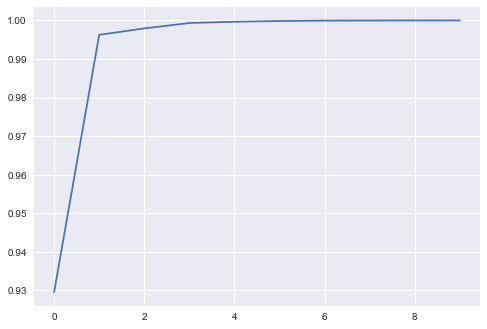

In [30]:
fig, ax = plt.subplots()
ax.plot(np.cumsum(pca.explained_variance_ratio_[:10]))

In [31]:
X_pca[0]

array([ 3.16585486e+01,  1.51844863e+01,  4.31149328e-01, -7.64137660e-01,
        2.41036599e-01,  1.32638093e-01,  5.19638859e-01, -8.36755187e-02,
       -5.46629407e-02, -2.18892888e-02,  5.77629089e-02,  2.25246702e-02,
       -4.24223497e-03, -6.96222329e-03,  6.09934771e-03, -2.12484447e-02,
        1.13042341e-02, -3.34701954e-03, -1.07117119e-02,  1.23685558e-02,
       -2.74921018e-02, -1.43098557e-02,  1.21254077e-02, -1.27949114e-02,
        2.77330810e-03, -2.91237622e-03, -2.53314458e-03,  8.27685381e-03,
       -3.22037770e-03,  1.98078163e-03,  1.03972779e-03, -1.69607028e-04,
        6.75048101e-03,  6.51595623e-04, -7.07431258e-03,  2.64495442e-03,
        1.14282421e-03, -1.67440047e-03,  9.25022128e-04, -2.26867667e-03,
       -1.56754343e-03, -2.51991931e-03,  4.84271112e-04,  1.13629433e-03,
        2.54293320e-04, -2.34562434e-03, -3.29432452e-03, -1.51395097e-03,
       -1.01138558e-03,  5.69430150e-04])

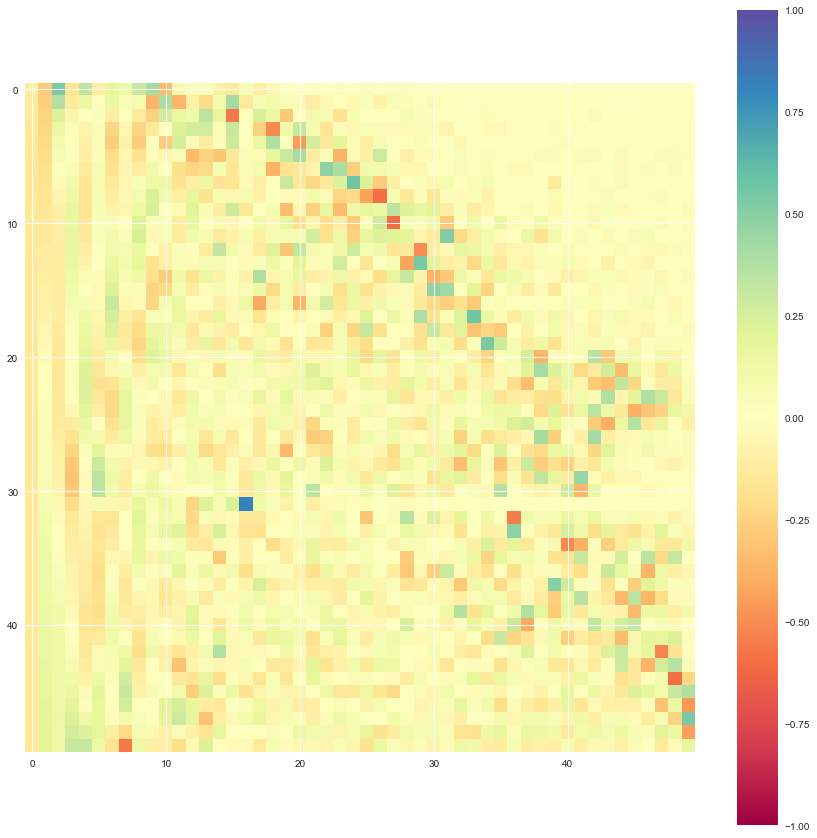

In [32]:
fig, ax = plt.subplots(figsize = (15,15))
plt.imshow(pca.components_.T, vmin = -1, vmax = 1, cmap = 'Spectral')
plt.colorbar()

In [33]:
X_pca_df = pd.DataFrame(pca.components_, columns = X.columns)

In [34]:
X_pca_df

,425.87,431.74,437.6,443.46,449.3,455.14,460.96,466.78,472.58,478.38,484.17,489.95,495.71,501.47,507.22,512.96,518.69,524.41,530.11,535.81,...,597.81,603.38,608.95,614.5,620.04,625.57,631.09,636.6,642.09,647.58,653.05,658.51,663.97,669.41,674.84,680.25,685.66,691.05,696.44,701.81
0,-0.124064,-0.127959,-0.131002,-0.133184,-0.134613,-0.135869,-0.137159,-0.138471,-0.139539,-0.140362,-0.141256,-0.141912,-0.142597,-0.143369,-0.143911,-0.144468,-0.144975,-0.145311,-0.145645,-0.145994,...,-0.145166,-0.144970,-0.144506,-0.144149,-0.143888,-0.143473,-0.143135,-0.142917,-0.142545,-0.142040,-0.141505,-0.141021,-0.140777,-0.140156,-0.139543,-0.138866,-0.137187,-0.136382,-0.136365,-0.135627
1,-0.277522,-0.260212,-0.243542,-0.228107,-0.216574,-0.205807,-0.193562,-0.179609,-0.166922,-0.156224,-0.144532,-0.135073,-0.124717,-0.111879,-0.102197,-0.091197,-0.079325,-0.070653,-0.060061,-0.045945,...,0.061938,0.076984,0.090969,0.098993,0.104589,0.112453,0.118193,0.121718,0.127362,0.134662,0.142216,0.148790,0.152186,0.159801,0.166694,0.173762,0.190352,0.197283,0.196241,0.201164
2,0.531888,0.369286,0.223516,0.136938,0.094325,0.058139,0.012595,-0.034876,-0.065130,-0.087504,-0.098922,-0.106659,-0.111498,-0.119075,-0.122078,-0.122194,-0.123249,-0.121862,-0.125700,-0.136025,...,-0.077635,-0.048518,-0.017408,-0.001993,0.010274,0.027680,0.045581,0.062671,0.083322,0.102515,0.114712,0.121296,0.117867,0.117864,0.115593,0.112883,0.130421,0.134905,0.127139,0.131707
3,-0.167798,-0.130255,-0.059410,-0.016408,-0.005831,0.009090,0.044021,0.088615,0.129395,0.157205,0.155197,0.159841,0.158178,0.146109,0.129336,0.101245,0.069588,0.042101,0.023828,0.018237,...,-0.294477,-0.210266,-0.139336,-0.123648,-0.109233,-0.087996,-0.075671,-0.070959,-0.058385,-0.035542,-0.010784,0.011322,0.033188,0.066677,0.105664,0.143163,0.191890,0.228105,0.259246,0.298432
4,0.321616,0.154989,0.004165,-0.067547,-0.089097,-0.101138,-0.131744,-0.160889,-0.167197,-0.169118,-0.151164,-0.136074,-0.106984,-0.070712,-0.029255,0.018306,0.059680,0.107220,0.142191,0.171025,...,-0.024128,-0.047747,-0.067818,-0.075509,-0.086946,-0.102962,-0.116871,-0.122971,-0.141180,-0.161218,-0.160551,-0.155744,-0.141460,-0.118459,-0.083769,-0.032683,0.030333,0.118156,0.219115,0.311027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,0.000501,0.004589,-0.002716,-0.009826,0.014446,-0.005825,-0.013096,0.012053,0.007389,-0.013072,-0.005225,0.040438,0.019757,-0.018926,-0.029545,-0.016953,0.034202,-0.038093,-0.029156,-0.069960,...,0.024393,-0.002828,0.065551,-0.174212,0.117678,0.004275,0.075943,-0.272378,0.339749,-0.344303,0.299957,-0.059857,0.089094,-0.139872,-0.143627,0.232535,-0.086566,-0.024147,0.060348,-0.031463
46,0.000502,-0.002973,0.001585,-0.006989,0.001783,-0.005555,0.028017,-0.009665,-0.010409,-0.004304,0.009566,0.058693,-0.034205,-0.055530,0.018201,-0.012215,0.068801,-0.020964,-0.062903,0.013375,...,-0.044494,0.006180,-0.045682,-0.085137,0.078312,0.343236,-0.363797,0.206576,-0.354818,0.134974,-0.007568,0.190000,0.161319,-0.369154,-0.015127,0.186939,0.006358,-0.120206,0.047184,0.004771
47,-0.000498,-0.014515,0.017838,0.017394,-0.006235,-0.015854,0.003611,0.004774,-0.028987,0.009835,0.053115,0.005732,-0.045952,0.002830,-0.047940,0.044726,-0.008570,0.005896,0.010976,-0.017857,...,0.029222,0.006506,-0.019804,0.205061,-0.142257,-0.220510,0.118044,0.120706,-0.204978,0.137523,0.061755,0.180559,-0.530013,0.260350,0.097402,0.097490,-0.306857,0.069681,0.207248,-0.130638
48,0.010198,-0.008536,-0.009920,0.003496,-0.012414,0.024510,-0.015736,0.010472,0.000922,-0.000798,0.001166,0.020731,-0.026301,-0.002875,0.011696,-0.014341,-0.046556,0.049687,0.020059,0.025490,...,0.002479,0.002424,-0.073447,0.045772,-0.135434,0.306773,-0.105473,-0.010367,-0.015866,-0.094959,-0.035391,0.230350,-0.168012,0.353572,-0.599156,0.299124,0.143384,-0.244622,0.133862,-0.036285


In [35]:
X.shape

(834, 50)

In [36]:
X_pca.shape

(834, 50)

In [37]:
pca.components_.shape

(50, 50)

In [38]:
pca.singular_values_.shape

(50,)